link: https://www.kaggle.com/jindongwang92/crossposition-activity-recognition

https://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring
        
# PAMAP2

Columns 1~243 are features, listed in the order of 'Wrist', 'Chest', and 'Ankle'. 

Column 244 is the activity label. 

Column 245 denotes the person (1~9).



In [1]:
import scipy.io
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filename = "pamap"
mat = scipy.io.loadmat('../Data/Dataset_PerCom18_STL/'+filename+".mat")
# print(len(mat["data_pamap"][0]), len(mat["data_pamap"]))
# mat["data_pamap"][0]

In [3]:
raw = pd.DataFrame(mat["data_pamap"])

In [4]:
columns = ["Feat"+str(i) for i in range(243)] + ["ActivityID", "PersonID"]
raw.columns = columns
raw.head()

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,...,Feat235,Feat236,Feat237,Feat238,Feat239,Feat240,Feat241,Feat242,ActivityID,PersonID
0,-0.985865,-0.943370,-0.392865,-0.971917,-0.392865,-0.944107,-0.440860,-0.985865,-0.955370,-0.966996,...,0.194576,0.148544,-0.600225,-0.966178,-0.975980,-0.994310,-0.493846,-0.705221,1.0,1.0
1,-0.980813,-0.939876,-0.392865,-0.967848,-0.392865,-0.940120,-0.562724,-0.980813,-0.949874,-0.958106,...,0.296708,0.112212,-0.613984,-0.966956,-0.977905,-0.996659,-0.943339,-0.992864,1.0,1.0
2,-0.981071,-0.923581,-0.415095,-0.953571,-0.415095,-0.923974,-0.555556,-0.981071,-0.928253,-0.941826,...,-0.304042,0.264640,-0.348350,-0.932341,-0.917266,-0.923750,0.556087,0.362490,1.0,1.0
3,-0.980063,-0.924217,-0.415124,-0.953380,-0.415124,-0.923784,-0.448029,-0.980063,-0.930109,-0.939370,...,-0.737156,-0.347023,0.060504,-0.626389,-0.023482,0.061547,0.441436,0.205478,1.0,1.0
4,-0.981735,-0.958505,-0.415124,-0.953380,-0.084243,-0.923784,-0.354839,-0.981735,-0.967207,-0.975581,...,-0.678535,-0.257434,-0.010541,-0.697847,-0.053474,-0.287784,-0.306239,-0.739722,1.0,1.0


In [9]:
activityNames = [None, "lying", "sitting", "standing", "walking", "running", "cycling", "Nordic walking", None, "watching TV", "computer work", "car driving", "ascending stairs", "descending stairs", None, None, "vacuum cleaning", "ironing", "folding laundry", "house cleaning", "playing soccer", None, None, None, "rope jumping"]

In [10]:
def add_activityname(x):
    name = "R"+str(int(x["PersonID"]))+"_"+activityNames[int(x["ActivityID"])]
    name = activityNames[int(x["ActivityID"])]
    return name

raw["ActivityName"] = raw.apply(add_activityname, axis=1)
df = raw.drop('ActivityID', 1)
df = df.drop('PersonID', 1)
df.head()

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,...,Feat234,Feat235,Feat236,Feat237,Feat238,Feat239,Feat240,Feat241,Feat242,ActivityName
0,-0.985865,-0.943370,-0.392865,-0.971917,-0.392865,-0.944107,-0.440860,-0.985865,-0.955370,-0.966996,...,-0.999880,0.194576,0.148544,-0.600225,-0.966178,-0.975980,-0.994310,-0.493846,-0.705221,lying
1,-0.980813,-0.939876,-0.392865,-0.967848,-0.392865,-0.940120,-0.562724,-0.980813,-0.949874,-0.958106,...,-0.999910,0.296708,0.112212,-0.613984,-0.966956,-0.977905,-0.996659,-0.943339,-0.992864,lying
2,-0.981071,-0.923581,-0.415095,-0.953571,-0.415095,-0.923974,-0.555556,-0.981071,-0.928253,-0.941826,...,-0.996374,-0.304042,0.264640,-0.348350,-0.932341,-0.917266,-0.923750,0.556087,0.362490,lying
3,-0.980063,-0.924217,-0.415124,-0.953380,-0.415124,-0.923784,-0.448029,-0.980063,-0.930109,-0.939370,...,-0.413223,-0.737156,-0.347023,0.060504,-0.626389,-0.023482,0.061547,0.441436,0.205478,lying
4,-0.981735,-0.958505,-0.415124,-0.953380,-0.084243,-0.923784,-0.354839,-0.981735,-0.967207,-0.975581,...,-0.719344,-0.678535,-0.257434,-0.010541,-0.697847,-0.053474,-0.287784,-0.306239,-0.739722,lying


In [11]:
# Scale to [0, 1]
for i in range(243):
    f = (df["Feat"+str(i)]+1)/2
    df["Feat"+str(i)] = f

In [12]:
df.head()

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,...,Feat234,Feat235,Feat236,Feat237,Feat238,Feat239,Feat240,Feat241,Feat242,ActivityName
0,0.007067,0.028315,0.303567,0.014041,0.303567,0.027946,0.279570,0.007067,0.022315,0.016502,...,0.000060,0.597288,0.574272,0.199888,0.016911,0.012010,0.002845,0.253077,0.147390,lying
1,0.009593,0.030062,0.303567,0.016076,0.303567,0.029940,0.218638,0.009593,0.025063,0.020947,...,0.000045,0.648354,0.556106,0.193008,0.016522,0.011048,0.001671,0.028331,0.003568,lying
2,0.009465,0.038210,0.292452,0.023214,0.292452,0.038013,0.222222,0.009465,0.035874,0.029087,...,0.001813,0.347979,0.632320,0.325825,0.033829,0.041367,0.038125,0.778044,0.681245,lying
3,0.009969,0.037891,0.292438,0.023310,0.292438,0.038108,0.275986,0.009969,0.034946,0.030315,...,0.293388,0.131422,0.326488,0.530252,0.186806,0.488259,0.530773,0.720718,0.602739,lying
4,0.009133,0.020747,0.292438,0.023310,0.457879,0.038108,0.322581,0.009133,0.016396,0.012209,...,0.140328,0.160732,0.371283,0.494729,0.151077,0.473263,0.356108,0.346881,0.130139,lying


In [13]:
df.to_csv(filename+".feat", index=False)

In [14]:
df["ActivityName"].unique()

array(['lying', 'sitting', 'standing', 'ironing', 'vacuum cleaning',
       'ascending stairs', 'descending stairs', 'walking',
       'Nordic walking', 'cycling', 'running', 'rope jumping'],
      dtype=object)

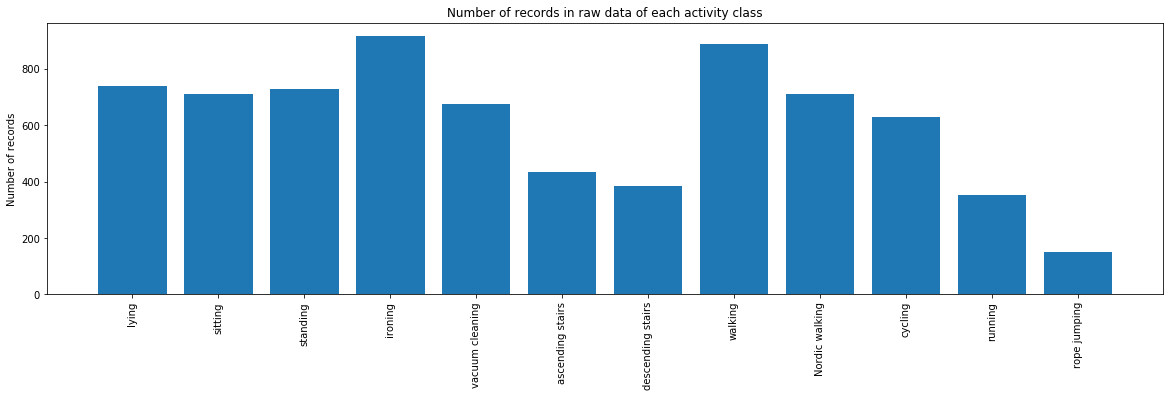

In [15]:
activity_labels = df["ActivityName"].unique()
ind = np.arange(len(activity_labels))
plt.rcParams['figure.figsize'] = [10, 5]
nRow = []
for label in activity_labels:
    c = len(df[df["ActivityName"]==label])
    nRow.append(c)
    
plt.rcParams['figure.figsize'] = [20, 5]
p1 = plt.bar(ind, nRow)

plt.ylabel('Number of records')
plt.title('Number of records in raw data of each activity class')
plt.xticks(ind, activity_labels, rotation='vertical')

plt.show()